Para esta atividade iremos usar um conjunto de dados sobre preços de imóveis. O conjunto original pode ser encontrado no [kaggle](https://www.kaggle.com/datasets/gunhee/koreahousedata). Os dados que usaremos foram alterados para facilitar as análises.

In [2]:
import pandas as pd
import numpy as np

# importando statsmodels
import statsmodels.api as sm

# criando gráfico de dispersão
import seaborn as sns

#Teste de Homocedasticidade
from statsmodels.stats.api import het_goldfeldquandt

#Teste de Normalidade dos Resíduos
from scipy.stats import shapiro

#Autocorrelação dos Residuos
from statsmodels.stats.stattools import durbin_watson

# importando StandardScaler Padronizar os dados
from sklearn.preprocessing import StandardScaler

#Multicolinearidade
from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.tools.eval_measures import mse
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import meanabs
pd.set_option('float_format', '{:f}'.format)


# Regressão Linear Simples

## Atividade 1: Importe os dados e verifique se há dados faltantes.

In [3]:
# seu código
df = pd.read_excel('apartamentos.xlsx')
df.head(2)

,preco,ano_construcao,ano_Venda,m2,andar,tipo_Aquecimento,tempo_ate_onibus,tempo_ate_metro,qtde_elevadores,qtde_escritorios_publicos_perto,qtde_hospitais_perto,qtde_lojas_departamento_perto,qtde_shoppings_perto,qtde_estacionamentos_perto,qtde_escolas_fundamental1_perto,qtde_escolas_fundamental2_perto,qtde_escolas_medio_perto,qtde_universidades_perto
0,849552,2006,2007,75.623042,3,individual,5min~10min,10min~15min,0,2,1,1,1,0,3,2,2,2
1,307962,1985,2007,54.534061,8,individual,0~5min,5min~10min,2,5,1,2,1,1,2,1,1,0


In [5]:
# seu código
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
preco,5891.0,NaN,NaN,NaN,1327308.675267,638305.118677,196458.0,865482.0,1247784.0,1746900.0,3515040.0
ano_construcao,5891.0,NaN,NaN,NaN,2002.967408,8.811782,1978.0,1993.0,2006.0,2008.0,2015.0
ano_Venda,5891.0,NaN,NaN,NaN,2012.691563,2.905488,2007.0,2010.0,2013.0,2015.0,2017.0
m2,5891.0,NaN,NaN,NaN,88.775243,35.532058,12.541905,59.829532,84.54173,106.745547,217.114311
andar,5891.0,NaN,NaN,NaN,12.026311,7.548743,1.0,6.0,11.0,17.0,43.0
tipo_Aquecimento,5891,2,individual,5591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tempo_ate_onibus,5891,3,0~5min,4509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tempo_ate_metro,5891,5,0-5min,2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
qtde_elevadores,5891.0,NaN,NaN,NaN,11.145985,7.806232,0.0,5.0,11.0,16.0,27.0
qtde_escritorios_publicos_perto,5891.0,NaN,NaN,NaN,4.141572,1.793496,0.0,3.0,5.0,5.0,7.0


In [6]:
# seu código
df.isnull().sum()

preco                              0
ano_construcao                     0
ano_Venda                          0
m2                                 0
andar                              0
tipo_Aquecimento                   0
tempo_ate_onibus                   0
tempo_ate_metro                    0
qtde_elevadores                    0
qtde_escritorios_publicos_perto    0
qtde_hospitais_perto               0
qtde_lojas_departamento_perto      0
qtde_shoppings_perto               0
qtde_estacionamentos_perto         0
qtde_escolas_fundamental1_perto    0
qtde_escolas_fundamental2_perto    0
qtde_escolas_medio_perto           0
qtde_universidades_perto           0
dtype: int64

## Atividade 2: Selecione apenas as variáveis `preco` e `m2`, aplique o logaritmo natural na variável `m2` e verifique a correlação entre as variáveis.

In [9]:
# seu código
df = df[['preco','m2']]
df.head(2)

,preco,m2
0,849552,75.623042
1,307962,54.534061


In [10]:
# seu código
df['m2'] = np.log(df['m2'])
df.head(2)

,preco,m2
0,849552,4.325761
1,307962,3.998825


In [11]:
# seu código
df.corr()

,preco,m2
preco,1.000000,0.706048
m2,0.706048,1.000000


## Atividade 3: Crie um modelo de regressão linear simples e encontre os coeficientes do modelo.

In [13]:
# seu código
X = df['m2']
y = df['preco']

In [14]:
# seu código
X = sm.add_constant(X)

In [16]:
# estimando o modelo de regressão linear
modelo1 = sm.OLS(y, X).fit()

In [18]:
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     5854.
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:51:41   Log-Likelihood:                -85068.
No. Observations:                5891   AIC:                         1.701e+05
Df Residuals:                    5889   BIC:                         1.702e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.37e+06   6.17e+04    -54.642      0.0

* Dados que $R^2$ = 0,499, podemos dizer que a variável $m^2$ explica 49,9% da variável preço
* A equação da reta é Y(preco) = -3.37e6 + 1.067e6 * $m^2$

In [19]:
modelo1.params

const   -3.370460e+06
m2       1.066759e+06
dtype: float64

## Atividade 4: Verifique os pressupostos da regressão linear.

In [24]:
# prevendo valores para X
y_pred1 = modelo1.predict(X)

# calculando os resíduos
res1 = y - y_pred1

## Linearidade

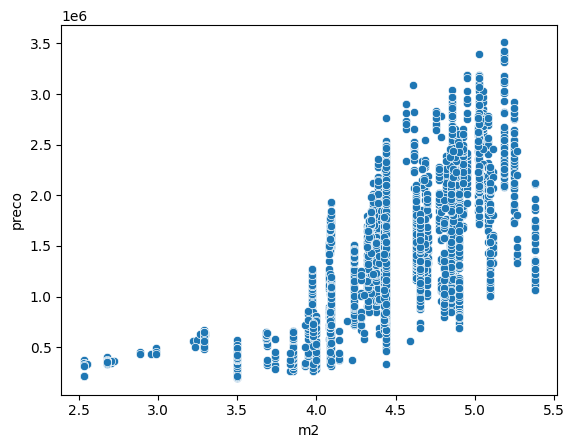

In [28]:
# criando gráfico de dispersão
sns.scatterplot(data=df, x='m2', y='preco');

## Homocedasticidade



Vamos checar a homocedasticidade com um teste de hipótese: Goldfeld Quandt. Este teste pode ser realizado importando-se a função `statsmodels.stats.api.het_goldfeldquandt()`.

Neste teste, a hipótese nula é de que há homocedasticidade.

In [29]:
stat, p_valor, _ = het_goldfeldquandt(res1, X)
p_valor

3.423253608686079e-22

<b style='color:red'>Como o p valor é menor que 0.05, podemos rejeitar a hipótese nula. Isto é, podemos supor que não há homocedasticidade nos resíduos.</b>

## Normalidade dos Resíduos



Vamos checar a normalidadde dos resíduos usando o teste de hipóteses de Shapiro-Wilk. Neste caso, a hipótese nula é que a amostra segue distribuição normal. Podemos realizar este teste importando a função `scipy.stats.shapiro()`.

In [30]:
# seu código
stat, p_valor = shapiro(res1)
p_valor

c:\Users\leolk\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


7.838917594454599e-26

<b style='color:red'>Como o p valor é menor que 0.05, podemos rejeitar a hipótese nula. Isto indica que nosso modelo não satisfaz todos os pressupostos que deveria satisfazer. </b>

## Autocorrelação dos Resíduos / Independência



Para checar se há autocorrelação entre os resíduos vamos usar o teste de hipótese de Durbin Watson. Ele pode ser importado do `statsmodels` com a sintaxe `statsmodels.stats.stattolls.durbin_watons()`.

In [31]:
# seu código
durbin_watson(res1)

0.7433704819691179

<b style='color:red'>Valores entre 1.5 e 2.5 indicam que não há autocorrelação, valores fora dessa faixa indicam que há autocorrelação. Ou seja, há correlação</b>

## Multicolinearidade



In [ ]:
# seu código

# Regressão Linear Múltipla

## Atividade 5: Crie um modelo de regressão linear múltipla.

Para facilitar o trabalho, vamos deixar um pré processamento pronto.

In [32]:
# importando os dados
df = pd.read_excel('apartamentos.xlsx')
df.head()

,preco,ano_construcao,ano_Venda,m2,andar,tipo_Aquecimento,tempo_ate_onibus,tempo_ate_metro,qtde_elevadores,qtde_escritorios_publicos_perto,qtde_hospitais_perto,qtde_lojas_departamento_perto,qtde_shoppings_perto,qtde_estacionamentos_perto,qtde_escolas_fundamental1_perto,qtde_escolas_fundamental2_perto,qtde_escolas_medio_perto,qtde_universidades_perto
0,849552,2006,2007,75.623042,3,individual,5min~10min,10min~15min,0,2,1,1,1,0,3,2,2,2
1,307962,1985,2007,54.534061,8,individual,0~5min,5min~10min,2,5,1,2,1,1,2,1,1,0
2,292032,1985,2007,54.534061,6,individual,0~5min,5min~10min,2,5,1,2,1,1,2,1,1,0
3,2283180,2006,2007,191.008568,8,individual,0~5min,0-5min,11,1,1,0,1,0,2,2,1,2
4,1327428,1993,2007,163.602183,3,individual,0~5min,15min~20min,20,6,2,0,1,0,4,3,5,5


In [33]:
# Vamos condensar algumas variáveis em uma única
df['qtde_servicos'] = df['qtde_hospitais_perto'] + \
                      df['qtde_lojas_departamento_perto'] + \
                      df['qtde_escritorios_publicos_perto'] + \
                      df['qtde_escolas_fundamental1_perto'] + \
                      df['qtde_escolas_fundamental2_perto'] + \
                      df['qtde_escolas_medio_perto'] + \
                      df['qtde_universidades_perto']

# excluindo as variáveis originais do DataFrame
df.drop(['qtde_hospitais_perto','qtde_lojas_departamento_perto',
         'qtde_escritorios_publicos_perto','qtde_escolas_fundamental1_perto',
         'qtde_escolas_fundamental2_perto','qtde_escolas_medio_perto',
         'qtde_universidades_perto'],
        axis=1, inplace=True)

In [34]:
# criando nova variável
df['qtde_conveniencia'] = df['qtde_shoppings_perto'] + df['qtde_estacionamentos_perto']

# excluindo variáveis do DataFrame
df.drop(['qtde_shoppings_perto','qtde_estacionamentos_perto'],
        axis=1, inplace=True)

df.head()

,preco,ano_construcao,ano_Venda,m2,andar,tipo_Aquecimento,tempo_ate_onibus,tempo_ate_metro,qtde_elevadores,qtde_servicos,qtde_conveniencia
0,849552,2006,2007,75.623042,3,individual,5min~10min,10min~15min,0,13,1
1,307962,1985,2007,54.534061,8,individual,0~5min,5min~10min,2,12,2
2,292032,1985,2007,54.534061,6,individual,0~5min,5min~10min,2,12,2
3,2283180,2006,2007,191.008568,8,individual,0~5min,0-5min,11,9,1
4,1327428,1993,2007,163.602183,3,individual,0~5min,15min~20min,20,25,1


In [36]:
# aplicando One Hot Encoding à variável tipo_Aquecimento
df_aux = pd.get_dummies(df['tipo_Aquecimento'], prefix='tipo_Aquecimento')
df = pd.concat([df, df_aux], axis=1)
df.drop(['tipo_Aquecimento', 'tipo_Aquecimento_central'], axis=1, inplace=True)

In [40]:
# aplicando One Hot Encoding à variável tempo_ate_onibus
df_aux = pd.get_dummies(df['tempo_ate_onibus'], prefix='tempo_ate_onibus')
df = pd.concat([df, df_aux], axis=1)
df.drop(['tempo_ate_onibus', 'tempo_ate_onibus_10min~15min'], axis=1, inplace=True)

In [41]:
# aplicando One Hot Encoding à variável tempo_ate_metro
df_aux = pd.get_dummies(df['tempo_ate_metro'], prefix='tempo_ate_metro')
df = pd.concat([df, df_aux], axis=1)
df.drop(['tempo_ate_metro', 'tempo_ate_metro_no_bus_stop_nearby'], axis=1, inplace=True)
df.head()

,preco,ano_construcao,ano_Venda,m2,andar,qtde_elevadores,qtde_servicos,qtde_conveniencia,tipo_Aquecimento_individual,tempo_ate_onibus_0~5min,tempo_ate_onibus_5min~10min,tempo_ate_metro_0-5min,tempo_ate_metro_10min~15min,tempo_ate_metro_15min~20min,tempo_ate_metro_5min~10min
0,849552,2006,2007,75.623042,3,0,13,1,1,0,1,0,1,0,0
1,307962,1985,2007,54.534061,8,2,12,2,1,1,0,0,0,0,1
2,292032,1985,2007,54.534061,6,2,12,2,1,1,0,0,0,0,1
3,2283180,2006,2007,191.008568,8,11,9,1,1,1,0,1,0,0,0
4,1327428,1993,2007,163.602183,3,20,25,1,1,1,0,0,0,1,0


In [42]:
# separando os dados em X e y
X = df.drop('preco', axis=1)
y = df['preco']

In [74]:
# importando StandardScaler
from sklearn.preprocessing import StandardScaler

# instanciando a função
scaler = StandardScaler()

# criando uma cópia dos valores
X_scaled = X.copy()

# treino p/ a padronização
scaler.fit(X_scaled)

# aplicando a padronização
X_scaled[X_scaled.columns] = scaler.transform(X_scaled)

X_scaled.head()

,ano_construcao,ano_Venda,m2,andar,qtde_elevadores,qtde_servicos,qtde_conveniencia,tipo_Aquecimento_individual,tempo_ate_onibus_0~5min,tempo_ate_onibus_5min~10min,tempo_ate_metro_0-5min,tempo_ate_metro_10min~15min,tempo_ate_metro_15min~20min,tempo_ate_metro_5min~10min
0,0.344181,-1.959067,-0.370182,-1.195839,-1.427953,-0.723875,-0.772684,0.231641,-1.806284,1.854545,-0.938566,2.511759,-0.439310,-0.488514
1,-2.039194,-1.959067,-0.963752,-0.533420,-1.171726,-0.896304,0.524518,0.231641,0.553623,-0.539216,-0.938566,-0.398127,-0.439310,2.047024
2,-2.039194,-1.959067,-0.963752,-0.798388,-1.171726,-0.896304,0.524518,0.231641,0.553623,-0.539216,-0.938566,-0.398127,-0.439310,2.047024
3,0.344181,-1.959067,2.877458,-0.533420,-0.018703,-1.413592,-0.772684,0.231641,0.553623,-0.539216,1.065455,-0.398127,-0.439310,-0.488514
4,-1.131242,-1.959067,2.106078,-1.195839,1.134320,1.345276,-0.772684,0.231641,0.553623,-0.539216,-0.938566,-0.398127,2.276298,-0.488514


In [47]:
# Adicionando a constante ao modelo de regressão linear múltipla
X2 = sm.add_constant(X_scaled)

# Ajustando o modelo
modelo2 = sm.OLS(y, X2).fit()

# Exibindo os resultados
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     2000.
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:31:21   Log-Likelihood:                -81941.
No. Observations:                5891   AIC:                         1.639e+05
Df Residuals:                    5876   BIC:                         1.640e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

* Dados que $R^2$ =  0.827,  podemos dizer que a variável $m^2$ explica 82,7% da variável preço

In [53]:
# seu código
modelo2.params

const                         1327308.675267
ano_construcao                 131720.147816
ano_Venda                      207526.661846
m2                             401830.968801
andar                           67763.307074
qtde_elevadores                 79177.803397
qtde_servicos                  -87364.602539
qtde_conveniencia                5713.787333
tipo_Aquecimento_individual     67037.506109
tempo_ate_onibus_0~5min        270011.623891
tempo_ate_onibus_5min~10min    257727.169011
tempo_ate_metro_0-5min          74024.518362
tempo_ate_metro_10min~15min     49945.027715
tempo_ate_metro_15min~20min    -24013.993302
tempo_ate_metro_5min~10min      59627.856302
dtype: float64

## Atividade 6: Faça a previsão do preço de um apartamento com as seguinte características:
ano_construcao = 2000

ano_Venda = 2003 

m2 = 83

andar = 2

qtde_elevadores = 1

qtde_servicos = 4

qtde_conveniencia = 2

tipo_Aquecimento_individual = 1

tempo_ate_onibus_0~5min = 0

tempo_ate_onibus_5min~10min = 1

tempo_ate_metro_0-5min = 1

tempo_ate_metro_10min~15min = 0

tempo_ate_metro_15min~20min = 0

tempo_ate_metro_5min~10min = 0

In [99]:
# seu código
X3 = X2.drop(columns=['const'])
X3[X3.columns]= 2000,2003,83,2,1,4,2,1,0,1,1,0,0,0
X3 = X3.head(1)

In [100]:
X3 = scaler.transform(X3)

In [101]:
X3 = np.insert(X3, 0, 1)

In [104]:
print(modelo2.predict(X3))

[580413.42306106]


## Atividade 7: Verifique os pressupostos do modelo.

In [105]:
# prevendo valores para X
y_pred2 = modelo2.predict(X2)

# calculando os resíduos
res2 = y - y_pred2

## Homocedasticidade dos Resíduos

In [106]:
stat, p_valor, _ = het_goldfeldquandt(res2, X2)
p_valor

1.1901268230238545e-57

<b style='color:red'>Como o p valor é menor que 0.05, podemos rejeitar a hipótese nula. Não há variância Constante. Isto é, podemos supor que não há homocedasticidade nos resíduos. </b>

## Normalidade dos Reíduos

In [107]:
# seu código
stat, p_valor = shapiro(res2)
p_valor

c:\Users\leolk\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


1.2338423639140534e-31

<b style='color:red'>Como o p valor é menor que 0.05, podemos rejeitar a hipótese nula. Isto é, podemos considerar que os resíduos não são normalmente distribuídos.</b>

## Autocorrelação dos Resíduos

In [108]:
# seu código
durbin_watson(res2)

0.9769517207167954

<b style='color:red'><b style='color:red'>Valores entre 1.5 e 2.5 indicam que não há autocorrelação, valores fora dessa faixa indicam que há autocorrelação. Ou seja, há correlação</b></b>

Multicolinearidade

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
    
# Encontrando VIF para cada variável
#VIF = []
VIF = [variance_inflation_factor(X2.values, i) for i in range(X.shape[1])]

# exibindo o VIF para cada variável
for indice, vif in enumerate(VIF):
  print(f'{X_scaled.columns[indice]}: {vif}')

ano_construcao: 1.0000000000000022
ano_Venda: 2.8769439253776743
m2: 1.2074901489750314
andar: 1.5790474186140362
qtde_elevadores: 1.1770457683797
qtde_servicos: 2.9233278102510476
qtde_conveniencia: 2.448935745707547
tipo_Aquecimento_individual: 1.6080686093925656
tempo_ate_onibus_0~5min: 4.381063755907036
tempo_ate_onibus_5min~10min: 24.535240105582353
tempo_ate_metro_0-5min: 23.55155044796696
tempo_ate_metro_10min~15min: 8.837772704107909
tempo_ate_metro_15min~20min: 7.932944735408352
tempo_ate_metro_5min~10min: 8.04640147760748


<b style='color:red'>Como tem valores são maiores que 10, há indícios de multicolinearidade.</b>

## Atividade 7: Avalie e compare ambos os modelos e decida qual é melhor.

### R² e R² Ajustado

In [110]:
# seu código
print(f"Modelo1: R2 = {modelo1.rsquared}, R2 Ajustado = {modelo1.rsquared_adj}")
print(f"Modelo2: R2 = {modelo2.rsquared}, R2 Ajustado = {modelo2.rsquared_adj}")

Modelo1: R2 = 0.4985037705616263, R2 Ajustado = 0.498418612431309
Modelo2: R2 = 0.8265485207255558, R2 Ajustado = 0.8261352598831728


### RMSE (Root Mean Squared Error)

In [111]:
from statsmodels.tools.eval_measures import rmse

print(f"RMSE Modelo1: {rmse(y, res1)}")
print(f"RMSE Modelo2: {rmse(y, res2)}")

RMSE Modelo1: 1401720.7069513137
RMSE Modelo2: 1448604.379400669


### MAE (Mean Absolute Error)

In [113]:
from statsmodels.tools.eval_measures import meanabs

print(f'MAE Modelo1: {meanabs(y, res1)}')
print(f'MAE Modelo2: {meanabs(y, res2)}')

MAE Modelo1: 1338568.4516168614
MAE Modelo2: 1327392.9153251608


<b style='color:red'>Utilizando os teste de R² e AIC ou BIC, eu escolheria o modelo 2, pois ele possui maior explicabilidade do Target utilizando as suas variáveis, e possui um menor AIC. </b>